In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
targets = pd.read_table('../data/NelsonEtal/S1_targets.txt')

In [4]:
targets.head()

,Gene,Gene37,Chromosome,Exon.NCBI.36.Start,Exon.NCBI.36.Stop,Exon.plus.50.bp.flanking.sequence.NCBI.36.Start,Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop,Entrez.Gene.ID,Transcript,Ensembl.Gene.ID,...,intron,upstream,downstream,code.cover,utr.cover,intron.cover,upstream.cover,downstream.cover,TargetLength,CoverLength
0,ABCB1,ABCB1,7,86970884,86971701,86970834,86971751,5243,NM_000927,ENSG00000085563,...,50,0,50,207,611,50,0,50,918,918
1,ABCB1,ABCB1,7,86973149,86973295,86973099,86973345,5243,NM_000927,ENSG00000085563,...,100,0,0,147,0,100,0,0,247,247
2,ABCB1,ABCB1,7,86976527,86976733,86976477,86976783,5243,NM_000927,ENSG00000085563,...,100,0,0,207,0,100,0,0,307,307
3,ABCB1,ABCB1,7,86982483,86982680,86982433,86982730,5243,NM_000927,ENSG00000085563,...,100,0,0,198,0,100,0,0,298,298
4,ABCB1,ABCB1,7,86983761,86983917,86983711,86983967,5243,NM_000927,ENSG00000085563,...,100,0,0,157,0,100,0,0,257,257


count    1989.000000
mean        0.943538
std         0.193125
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
dtype: float64

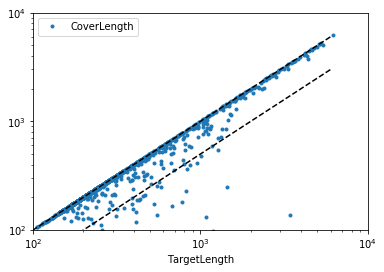

In [5]:
targets.plot(x='TargetLength', y='CoverLength', style='.')
plt.plot(np.arange(1,6e3),np.arange(1,6e3), '--k')
plt.plot(np.arange(1,6e3),np.arange(1,6e3)/2, '--k')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e2,1e4])
plt.ylim([1e2,1e4])
(targets['CoverLength']/targets['TargetLength']).describe()

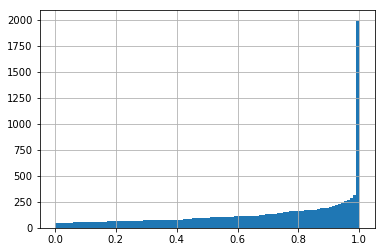

In [11]:
(targets['CoverLength']/targets['TargetLength']).hist(bins=np.arange(0,1.01,0.01), cumulative=True)

In [15]:
filt = (targets['TargetLength'] <= 1e3) & (targets['CoverLength']/targets['TargetLength'] >= 1)
print(filt.sum())

1582


In [32]:
targets[['utr', 'upstream', 'downstream', 'intron', 'code']].describe()

,utr,upstream,downstream,intron,code
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,162.351433,4.696833,4.759678,81.259427,176.598291
std,555.666326,14.554280,14.460261,135.118995,249.279071
min,0.000000,0.000000,0.000000,-3128.000000,0.000000
25%,0.000000,0.000000,0.000000,100.000000,84.000000
50%,0.000000,0.000000,0.000000,100.000000,128.000000
75%,34.000000,0.000000,0.000000,100.000000,185.000000
max,6112.000000,50.000000,51.000000,430.000000,4795.000000


count    564.000000
mean       0.862548
std        0.305355
min        0.000000
25%        0.963997
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

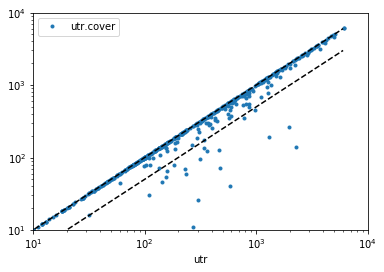

In [33]:
targets.plot(x='utr', y='utr.cover', style='.')
plt.plot(np.arange(1,6e3),np.arange(1,6e3), '--k')
plt.plot(np.arange(1,6e3),np.arange(1,6e3)/2, '--k')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e1,1e4])
plt.ylim([1e1,1e4])
(targets['utr.cover']/targets['utr']).describe()

count    1981.000000
mean        0.909929
std         1.144570
min       -49.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.038462
dtype: float64

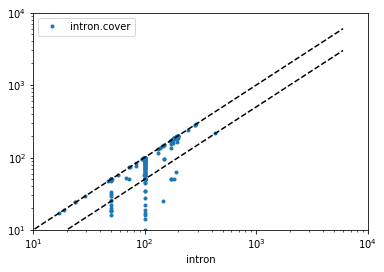

In [34]:
targets.plot(x='intron', y='intron.cover', style='.')
plt.plot(np.arange(1,6e3),np.arange(1,6e3), '--k')
plt.plot(np.arange(1,6e3),np.arange(1,6e3)/2, '--k')
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e1,1e4])
plt.ylim([1e1,1e4])
(targets['intron.cover']/targets['intron']).describe()

In [35]:
targets[targets['intron']<0]

,Gene,Gene37,Chromosome,Exon.NCBI.36.Start,Exon.NCBI.36.Stop,Exon.plus.50.bp.flanking.sequence.NCBI.36.Start,Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop,Entrez.Gene.ID,Transcript,Ensembl.Gene.ID,...,intron,upstream,downstream,code.cover,utr.cover,intron.cover,upstream.cover,downstream.cover,TargetLength,CoverLength
84,APH1A,APH1A,1,148504423,148505218,148504373,148505730,51107,NM_001077628,ENSG00000117362,...,-870,0,50,324,1854,-870,0,50,1358,1358
123,BICD1,BICD1,12,32381700,32381907,32381650,32382067,636,NM_001003398,ENSG00000151746,...,-108,0,0,526,0,-108,0,0,418,418
126,BICD1,BICD1,12,32421741,32422408,32421691,32422458,636,NM_001003398,ENSG00000151746,...,-618,0,50,88,1248,-618,0,50,768,768
213,CAMKK2,CAMKK2,12,120159880,120163055,120159830,120163105,10645,NaN,ENSG00000110931,...,-3128,0,48,243,6111,-3162,0,48,3276,3240
264,CCR9,CCR9,3,45903023,45903151,45902973,45903201,10803,NaN,ENSG00000173585,...,-47,50,0,0,226,-47,50,0,229,229
266,CCR9,CCR9,3,45917306,45919670,45917256,45919721,10803,NM_006641,ENSG00000173585,...,-2315,0,50,2163,2568,-2315,0,39,2466,2455
488,DRD3,DRD3,3,115332655,115332702,115332605,115332987,1814,NM_033663,ENSG00000151577,...,-84,0,0,467,0,-84,0,0,383,383
494,DYRK3,DYRK3,1,204875504,204875748,204875454,204876242,8444,NaN,ENSG00000143479,...,-147,50,0,10,544,-115,0,0,789,439
506,EDNRB,EDNRB,13,77367625,77370470,77367575,77370520,1910,NaN,ENSG00000136160,...,-101,0,42,252,2753,-101,0,42,2946,2946
588,GHSR,GHSR,3,173648102,173648940,173648052,173648990,2693,NM_004122,ENSG00000121853,...,-796,50,0,1642,43,-796,50,0,939,939


Intron sometimes has negative entries. An also negative entries where abs(intron.cover) < abs(intron)

In [36]:
list(targets)

['Gene',
 'Gene37',
 'Chromosome',
 'Exon.NCBI.36.Start',
 'Exon.NCBI.36.Stop',
 'Exon.plus.50.bp.flanking.sequence.NCBI.36.Start',
 'Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop',
 'Entrez.Gene.ID',
 'Transcript',
 'Ensembl.Gene.ID',
 'Ensembl.Transcript.ID',
 'code',
 'utr',
 'intron',
 'upstream',
 'downstream',
 'code.cover',
 'utr.cover',
 'intron.cover',
 'upstream.cover',
 'downstream.cover',
 'TargetLength',
 'CoverLength']

There doesn't appear to be information about utr vs. coding

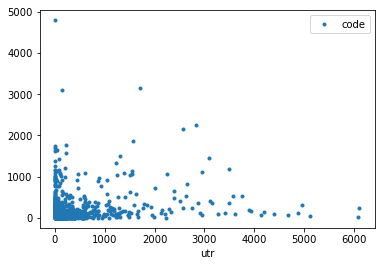

In [37]:
targets.plot(x='utr', y='code', style='.')

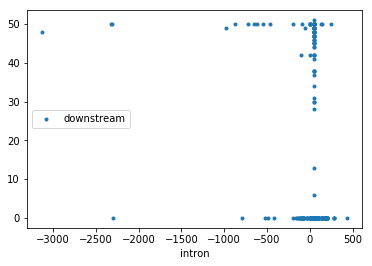

In [38]:
targets.plot(x='intron', y='downstream', style='.')

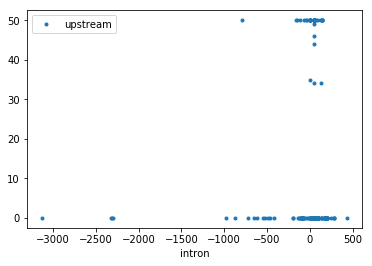

In [39]:
targets.plot(x='intron', y='upstream', style='.')

It seems like it will be easiest to do the following categories:
- all sites
- coding + utr (exons)
- coding
- utr

In [46]:
targets[['code','utr','intron.cover']].sum()

code            351254
utr             322917
intron.cover    153108
dtype: int64

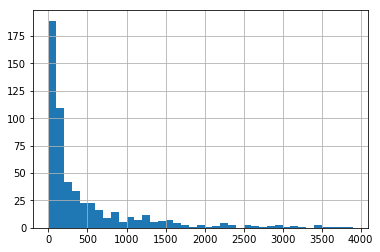

In [50]:
targets['utr'].hist(bins=np.arange(1,4000,100))

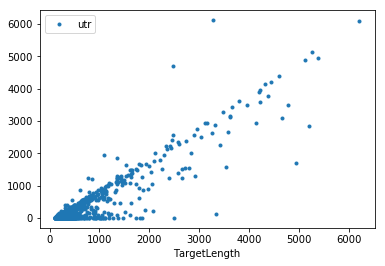

In [52]:
targets.plot(x='TargetLength', y='utr', style='.')

In [54]:
targets[targets['CoverLength']>targets['TargetLength']]

,Gene,Gene37,Chromosome,Exon.NCBI.36.Start,Exon.NCBI.36.Stop,Exon.plus.50.bp.flanking.sequence.NCBI.36.Start,Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop,Entrez.Gene.ID,Transcript,Ensembl.Gene.ID,...,intron,upstream,downstream,code.cover,utr.cover,intron.cover,upstream.cover,downstream.cover,TargetLength,CoverLength


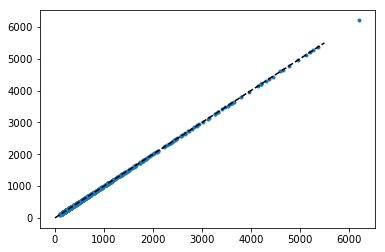

In [69]:
plt.plot(targets['TargetLength'], 1 + targets['Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop'] - targets['Exon.plus.50.bp.flanking.sequence.NCBI.36.Start'], '.')
plt.plot(np.arange(0,5500), np.arange(0,5500), '--k')

In [77]:
(targets['TargetLength'] - (1 + targets['Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop'] - targets['Exon.plus.50.bp.flanking.sequence.NCBI.36.Start'])).describe()

count    1989.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64

So TargetLength is the Exon plus the 50 bp upstream and downstream.

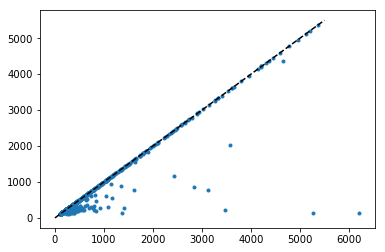

In [71]:
plt.plot(targets['TargetLength'], 101 + targets['Exon.NCBI.36.Stop'] - targets['Exon.NCBI.36.Start'], '.')
plt.plot(np.arange(0,5500), np.arange(0,5500), '--k')

However, the distance between exon start exon stop is not 100 bp less than the target length. Sometimes the exon is shorter.

In [72]:
(targets['TargetLength'] - (101 + targets['Exon.NCBI.36.Stop'] - targets['Exon.NCBI.36.Start'])).describe()

count    1989.000000
mean       23.684766
std       220.405317
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      6081.000000
dtype: float64

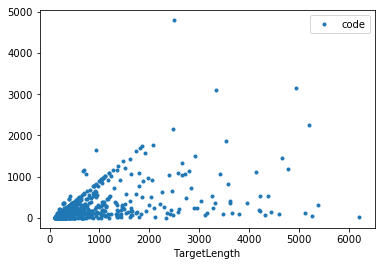

In [80]:
targets.plot(x='TargetLength', y='code', style='.')

In [55]:
targets[targets['code']>targets['TargetLength']]

,Gene,Gene37,Chromosome,Exon.NCBI.36.Start,Exon.NCBI.36.Stop,Exon.plus.50.bp.flanking.sequence.NCBI.36.Start,Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop,Entrez.Gene.ID,Transcript,Ensembl.Gene.ID,...,intron,upstream,downstream,code.cover,utr.cover,intron.cover,upstream.cover,downstream.cover,TargetLength,CoverLength
123,BICD1,BICD1,12,32381700,32381907,32381650,32382067,636,NM_001003398,ENSG00000151746,...,-108,0,0,526,0,-108,0,0,418,418
488,DRD3,DRD3,3,115332655,115332702,115332605,115332987,1814,NM_033663,ENSG00000151577,...,-84,0,0,467,0,-84,0,0,383,383
588,GHSR,GHSR,3,173648102,173648940,173648052,173648990,2693,NM_004122,ENSG00000121853,...,-796,50,0,1642,43,-796,50,0,939,939
702,HTR4,HTR4,5,147869212,147869780,147869162,147869830,3360,NaN,ENSG00000164270,...,-519,0,0,1142,46,-519,0,0,669,669
849,ITGB1,ITGB1,10,33237302,33237468,33237252,33237518,3688,NaN,ENSG00000150093,...,-117,0,0,373,11,-117,0,0,267,267
1061,MAPK14,MAPK14,6,36178326,36178404,36178276,36178454,1432,NaN,ENSG00000112062,...,-29,0,0,208,0,-29,0,0,179,179
1062,MAPK14,MAPK14,6,36183210,36183383,36183160,36183433,1432,NM_139014,ENSG00000112062,...,-74,0,0,336,12,-74,0,0,274,274
1288,OPRM1,OPRM1,6,154453780,154454300,154453730,154454460,4988,NaN,ENSG00000112038,...,-421,0,0,1057,95,-421,0,0,731,731
1389,PDE5A,PDE5A,4,120747312,120747900,120747262,120747950,8654,NaN,ENSG00000138735,...,-489,0,0,1174,4,-489,0,0,689,689
1504,PTGS1,PTGS1,9,124188546,124188721,124188496,124188882,5742,NM_080591,ENSG00000095303,...,-76,0,0,463,0,-76,0,0,387,387


In [53]:
targets[targets['utr']>targets['TargetLength']]

,Gene,Gene37,Chromosome,Exon.NCBI.36.Start,Exon.NCBI.36.Stop,Exon.plus.50.bp.flanking.sequence.NCBI.36.Start,Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop,Entrez.Gene.ID,Transcript,Ensembl.Gene.ID,...,intron,upstream,downstream,code.cover,utr.cover,intron.cover,upstream.cover,downstream.cover,TargetLength,CoverLength
84,APH1A,APH1A,1,148504423,148505218,148504373,148505730,51107,NM_001077628,ENSG00000117362,...,-870,0,50,324,1854,-870,0,50,1358,1358
126,BICD1,BICD1,12,32421741,32422408,32421691,32422458,636,NM_001003398,ENSG00000151746,...,-618,0,50,88,1248,-618,0,50,768,768
213,CAMKK2,CAMKK2,12,120159880,120163055,120159830,120163105,10645,NaN,ENSG00000110931,...,-3128,0,48,243,6111,-3162,0,48,3276,3240
266,CCR9,CCR9,3,45917306,45919670,45917256,45919721,10803,NM_006641,ENSG00000173585,...,-2315,0,50,2163,2568,-2315,0,39,2466,2455
494,DYRK3,DYRK3,1,204875504,204875748,204875454,204876242,8444,NaN,ENSG00000143479,...,-147,50,0,10,544,-115,0,0,789,439
619,GRIN1,GRIN1,9,139182047,139183028,139181997,139183078,2902,NM_000832,ENSG00000176884,...,-983,0,49,0,264,-132,0,0,1082,132
698,HTR4,HTR4,5,147810788,147811028,147810738,147811078,3360,NM_001040169,ENSG00000164270,...,-191,0,50,88,394,-191,0,50,341,341
1043,MAG,MAG,19,40496033,40496547,40495983,40496597,4099,NM_002361,ENSG00000105695,...,-465,0,50,165,865,-465,0,50,615,615
1063,MAPK14,MAPK14,6,36184135,36186513,36184085,36186563,1432,NM_139014,ENSG00000112062,...,-2329,0,50,68,4690,-2329,0,50,2479,2479
1261,NTRK2,NTRK2,9,86474415,86474623,86474365,86474673,4915,NaN,ENSG00000148053,...,-78,0,0,0,293,-81,0,0,309,212


In [81]:
targets[targets['utr']+targets['code']>targets['TargetLength']]

,Gene,Gene37,Chromosome,Exon.NCBI.36.Start,Exon.NCBI.36.Stop,Exon.plus.50.bp.flanking.sequence.NCBI.36.Start,Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop,Entrez.Gene.ID,Transcript,Ensembl.Gene.ID,...,intron,upstream,downstream,code.cover,utr.cover,intron.cover,upstream.cover,downstream.cover,TargetLength,CoverLength
84,APH1A,APH1A,1,148504423,148505218,148504373,148505730,51107,NM_001077628,ENSG00000117362,...,-870,0,50,324,1854,-870,0,50,1358,1358
123,BICD1,BICD1,12,32381700,32381907,32381650,32382067,636,NM_001003398,ENSG00000151746,...,-108,0,0,526,0,-108,0,0,418,418
126,BICD1,BICD1,12,32421741,32422408,32421691,32422458,636,NM_001003398,ENSG00000151746,...,-618,0,50,88,1248,-618,0,50,768,768
213,CAMKK2,CAMKK2,12,120159880,120163055,120159830,120163105,10645,NaN,ENSG00000110931,...,-3128,0,48,243,6111,-3162,0,48,3276,3240
266,CCR9,CCR9,3,45917306,45919670,45917256,45919721,10803,NM_006641,ENSG00000173585,...,-2315,0,50,2163,2568,-2315,0,39,2466,2455
488,DRD3,DRD3,3,115332655,115332702,115332605,115332987,1814,NM_033663,ENSG00000151577,...,-84,0,0,467,0,-84,0,0,383,383
494,DYRK3,DYRK3,1,204875504,204875748,204875454,204876242,8444,NaN,ENSG00000143479,...,-147,50,0,10,544,-115,0,0,789,439
506,EDNRB,EDNRB,13,77367625,77370470,77367575,77370520,1910,NaN,ENSG00000136160,...,-101,0,42,252,2753,-101,0,42,2946,2946
588,GHSR,GHSR,3,173648102,173648940,173648052,173648990,2693,NM_004122,ENSG00000121853,...,-796,50,0,1642,43,-796,50,0,939,939
603,GPBAR1,GPBAR1,2,218835693,218835899,218835643,218836734,151306,NM_001077191,ENSG00000179921,...,-95,0,0,962,163,-95,0,0,1092,1030


In [82]:
targets[targets['utr.cover']+targets['code.cover']>targets['TargetLength']]

,Gene,Gene37,Chromosome,Exon.NCBI.36.Start,Exon.NCBI.36.Stop,Exon.plus.50.bp.flanking.sequence.NCBI.36.Start,Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop,Entrez.Gene.ID,Transcript,Ensembl.Gene.ID,...,intron,upstream,downstream,code.cover,utr.cover,intron.cover,upstream.cover,downstream.cover,TargetLength,CoverLength
84,APH1A,APH1A,1,148504423,148505218,148504373,148505730,51107,NM_001077628,ENSG00000117362,...,-870,0,50,324,1854,-870,0,50,1358,1358
123,BICD1,BICD1,12,32381700,32381907,32381650,32382067,636,NM_001003398,ENSG00000151746,...,-108,0,0,526,0,-108,0,0,418,418
126,BICD1,BICD1,12,32421741,32422408,32421691,32422458,636,NM_001003398,ENSG00000151746,...,-618,0,50,88,1248,-618,0,50,768,768
213,CAMKK2,CAMKK2,12,120159880,120163055,120159830,120163105,10645,NaN,ENSG00000110931,...,-3128,0,48,243,6111,-3162,0,48,3276,3240
266,CCR9,CCR9,3,45917306,45919670,45917256,45919721,10803,NM_006641,ENSG00000173585,...,-2315,0,50,2163,2568,-2315,0,39,2466,2455
488,DRD3,DRD3,3,115332655,115332702,115332605,115332987,1814,NM_033663,ENSG00000151577,...,-84,0,0,467,0,-84,0,0,383,383
506,EDNRB,EDNRB,13,77367625,77370470,77367575,77370520,1910,NaN,ENSG00000136160,...,-101,0,42,252,2753,-101,0,42,2946,2946
588,GHSR,GHSR,3,173648102,173648940,173648052,173648990,2693,NM_004122,ENSG00000121853,...,-796,50,0,1642,43,-796,50,0,939,939
603,GPBAR1,GPBAR1,2,218835693,218835899,218835643,218836734,151306,NM_001077191,ENSG00000179921,...,-95,0,0,962,163,-95,0,0,1092,1030
698,HTR4,HTR4,5,147810788,147811028,147810738,147811078,3360,NM_001040169,ENSG00000164270,...,-191,0,50,88,394,-191,0,50,341,341


In [87]:
(targets[['code','utr','intron','upstream','downstream']].sum(axis=1) - targets['TargetLength']).describe()

count    1989.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64

So the columns add up. But the negative introns are necessary.

In [88]:
(targets[['code.cover','utr.cover','intron.cover','upstream.cover','downstream.cover']].sum(axis=1) - targets['CoverLength']).describe()

count    1989.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: float64

In [90]:
(targets['intron'] < 0).sum()

40

In [91]:
(targets['intron.cover'] < 0).sum()

40

In [92]:
((targets['intron'] < 0) & (targets['intron.cover'] < 0)).sum()

39

In [83]:
targets[targets['utr.cover']+targets['code.cover']+targets['intron']>targets['TargetLength']]

,Gene,Gene37,Chromosome,Exon.NCBI.36.Start,Exon.NCBI.36.Stop,Exon.plus.50.bp.flanking.sequence.NCBI.36.Start,Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop,Entrez.Gene.ID,Transcript,Ensembl.Gene.ID,...,intron,upstream,downstream,code.cover,utr.cover,intron.cover,upstream.cover,downstream.cover,TargetLength,CoverLength


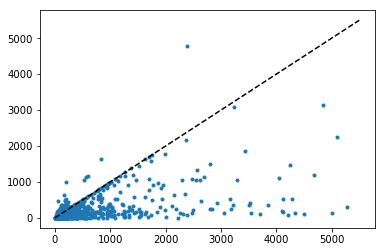

In [74]:
plt.plot(1 + targets['Exon.NCBI.36.Stop'] - targets['Exon.NCBI.36.Start'], targets['code'], '.')
plt.plot(np.arange(0,5500), np.arange(0,5500), '--k')

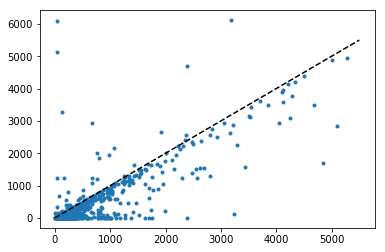

In [75]:
plt.plot(1 + targets['Exon.NCBI.36.Stop'] - targets['Exon.NCBI.36.Start'], targets['utr'], '.')
plt.plot(np.arange(0,5500), np.arange(0,5500), '--k')

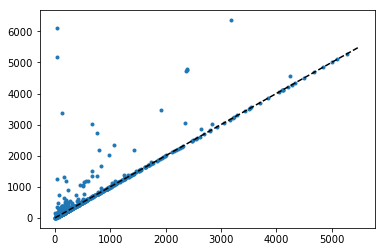

In [76]:
plt.plot(1 + targets['Exon.NCBI.36.Stop'] - targets['Exon.NCBI.36.Start'], targets['utr'] + targets['code'], '.')
plt.plot(np.arange(0,5500), np.arange(0,5500), '--k')

In [94]:
targets.groupby('Gene').sum()['code']

Gene
ABCB1       3843
ADAM10      2247
ADIPOQ       735
ADORA1       981
ADORA2A     4593
ADRB3       1227
ALOX5AP      486
APCS         672
APH1A        933
APH1B        774
APP         2313
BDKRB2      1176
BICD1       3184
BRD2         630
BRD3        2181
BRD4        4089
C5AR1       1053
CACNA1B     7020
CAMKK2      1846
CASR        3237
CCKAR       1287
CCKBR       1344
CCL11        294
CCL7         300
CCL8         300
CCR1        1068
CCR3        1068
CCR5        1059
CCR9        2184
CD28         663
            ... 
SIRT5       1086
SIRT6       1068
SIRT7       1203
SLC10A1     1213
SLC10A2     1047
SLC5A1      1995
SLC6A4      1893
SLC6A9      2151
SP110       2202
STIM1       2058
STK39       1638
SYK         1908
TACR1       1425
TACR2       1197
TACR3       1398
TBXA2R      1357
TGFB1       1173
TGFBR1      1512
TLR4        2520
TLR7        3150
TLR9        3099
TNFRSF1A    1368
TNFSF11      954
TNNI3K      2747
TRPC3       2547
TRPC6       2796
TRPM8       3315
TRPV1    

In [100]:
set(targets[targets['intron']<0]['Gene'])

{'APH1A',
 'BICD1',
 'CAMKK2',
 'CCR9',
 'DRD3',
 'DYRK3',
 'EDNRB',
 'GHSR',
 'GPBAR1',
 'GRIN1',
 'HTR4',
 'ITGB1',
 'KCNMA1',
 'MAG',
 'MAPK14',
 'NR1D1',
 'NTRK2',
 'OPRM1',
 'PDE5A',
 'PPARD',
 'PRKAG1',
 'PTGS1',
 'RTN4',
 'SIRT2',
 'SIRT3',
 'SIRT5',
 'SLC10A1',
 'TACR1',
 'TBXA2R',
 'ZAP70'}

In [19]:
(targets['Exon.NCBI.36.Start'] - targets['Exon.plus.50.bp.flanking.sequence.NCBI.36.Start']).describe()

count    1989.0
mean       50.0
std         0.0
min        50.0
25%        50.0
50%        50.0
75%        50.0
max        50.0
dtype: float64

In [21]:
(targets['Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop'] - targets['Exon.NCBI.36.Stop']).describe()

count    1989.000000
mean       73.684766
std       220.405317
min        50.000000
25%        50.000000
50%        50.000000
75%        50.000000
max      6131.000000
dtype: float64

In [22]:
right_overhang = targets['Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop'] - targets['Exon.NCBI.36.Stop']

In [23]:
np.sum(right_overhang != 50)

129

In [32]:
right_overhang[right_overhang != 50]

53        51
84       512
123      160
146      334
148      251
218      210
229       66
255       51
261      113
263       73
266       51
417      258
420      272
425      408
428      410
432       56
444      182
448      271
488      285
494      494
497      132
512      236
542      339
574      713
584       66
599      224
603      835
609      297
610      231
611      269
        ... 
1528     173
1585     195
1595      55
1660     211
1671     199
1683     170
1692    1268
1694     255
1695     227
1703     222
1704     219
1706     247
1747      96
1750     238
1751     379
1752     280
1759     135
1799     270
1810     162
1824    2408
1829     481
1882     234
1883     888
1894     243
1899     200
1920      63
1964     129
1973     287
1983     181
1987     492
Length: 129, dtype: int64

In [31]:
targets[right_overhang != 50]

,Gene,Gene37,Chromosome,Exon.NCBI.36.Start,Exon.NCBI.36.Stop,Exon.plus.50.bp.flanking.sequence.NCBI.36.Start,Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop,Entrez.Gene.ID,Transcript,Ensembl.Gene.ID,...,intron,upstream,downstream,code.cover,utr.cover,intron.cover,upstream.cover,downstream.cover,TargetLength,CoverLength
53,ADORA1,ADORA1,1,201401012,201403155,201400962,201403206,134,NaN,ENSG00000163485,...,50,0,50,640,1317,50,0,0,2245,2007
84,APH1A,APH1A,1,148504423,148505218,148504373,148505730,51107,NM_001077628,ENSG00000117362,...,-870,0,50,324,1854,-870,0,50,1358,1358
123,BICD1,BICD1,12,32381700,32381907,32381650,32382067,636,NM_001003398,ENSG00000151746,...,-108,0,0,526,0,-108,0,0,418,418
146,BRD4,BRD4,19,15210554,15210791,15210504,15211125,23476,NM_058243,ENSG00000141867,...,178,0,0,420,0,157,0,0,622,577
148,BRD4,BRD4,19,15211470,15211632,15211420,15211883,23476,NM_058243,ENSG00000141867,...,188,0,0,276,0,188,0,0,464,464
218,CAMKK2,CAMKK2,12,120171973,120172060,120171923,120172270,10645,NaN,ENSG00000110931,...,186,0,0,162,0,186,0,0,348,348
229,CAMKK2,CAMKK2,12,120218824,120218872,120218774,120218938,10645,NaN,ENSG00000110931,...,100,0,0,0,0,0,0,0,165,0
255,CCL8,CCL8,17,29671934,29672533,29671884,29672584,6355,NM_005623,ENSG00000108700,...,50,0,50,106,495,50,0,12,701,663
261,CCR3,CCR3,3,46281643,46283103,46281593,46283216,1232,NaN,ENSG00000183625,...,50,0,50,1068,456,50,0,34,1624,1608
263,CCR5,CCR5,3,46389387,46392677,46389337,46392750,1234,NaN,ENSG00000160791,...,50,0,49,0,138,0,0,0,3414,138


In [34]:
targets[targets['Gene'] == 'CAMKK2']

,Gene,Gene37,Chromosome,Exon.NCBI.36.Start,Exon.NCBI.36.Stop,Exon.plus.50.bp.flanking.sequence.NCBI.36.Start,Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop,Entrez.Gene.ID,Transcript,Ensembl.Gene.ID,...,intron,upstream,downstream,code.cover,utr.cover,intron.cover,upstream.cover,downstream.cover,TargetLength,CoverLength
213,CAMKK2,CAMKK2,12,120159880,120163055,120159830,120163105,10645,NaN,ENSG00000110931,...,-3128,0,48,243,6111,-3162,0,48,3276,3240
214,CAMKK2,CAMKK2,12,120165775,120166315,120165725,120166365,10645,NM_172214,ENSG00000110931,...,99,0,0,6,536,99,0,0,641,641
215,CAMKK2,CAMKK2,12,120166759,120166801,120166709,120166851,10645,NaN,ENSG00000110931,...,100,0,0,43,0,100,0,0,143,143
216,CAMKK2,CAMKK2,12,120167326,120167426,120167276,120167476,10645,NaN,ENSG00000110931,...,100,0,0,101,0,100,0,0,201,201
217,CAMKK2,CAMKK2,12,120170792,120170920,120170742,120170970,10645,NaN,ENSG00000110931,...,100,0,0,129,0,100,0,0,229,229
218,CAMKK2,CAMKK2,12,120171973,120172060,120171923,120172270,10645,NaN,ENSG00000110931,...,186,0,0,162,0,186,0,0,348,348
219,CAMKK2,CAMKK2,12,120174847,120174900,120174797,120174950,10645,NaN,ENSG00000110931,...,100,0,0,54,0,100,0,0,154,154
220,CAMKK2,CAMKK2,12,120175459,120175658,120175409,120175708,10645,NaN,ENSG00000110931,...,100,0,0,200,0,100,0,0,300,300
221,CAMKK2,CAMKK2,12,120177736,120177824,120177686,120177874,10645,NaN,ENSG00000110931,...,100,0,0,89,0,100,0,0,189,189
222,CAMKK2,CAMKK2,12,120177969,120177990,120177919,120178040,10645,NaN,ENSG00000110931,...,100,0,0,22,0,100,0,0,122,122


In [37]:
targets[218:220]

,Gene,Gene37,Chromosome,Exon.NCBI.36.Start,Exon.NCBI.36.Stop,Exon.plus.50.bp.flanking.sequence.NCBI.36.Start,Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop,Entrez.Gene.ID,Transcript,Ensembl.Gene.ID,...,intron,upstream,downstream,code.cover,utr.cover,intron.cover,upstream.cover,downstream.cover,TargetLength,CoverLength
218,CAMKK2,CAMKK2,12,120171973,120172060,120171923,120172270,10645,NaN,ENSG00000110931,...,186,0,0,162,0,186,0,0,348,348
219,CAMKK2,CAMKK2,12,120174847,120174900,120174797,120174950,10645,NaN,ENSG00000110931,...,100,0,0,54,0,100,0,0,154,154


In [44]:
targets['Exon.plus.50.bp.flanking.sequence.NCBI.36.Start'][219] - targets['Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop'][218] 

2527

In [43]:
targets['Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop'][217] - targets['Exon.plus.50.bp.flanking.sequence.NCBI.36.Start'][218]

-953

In [49]:
targets[['code', 'utr', 'upstream', 'downstream', 'intron', 'TargetLength']][218:220]

,code,utr,upstream,downstream,intron,TargetLength
218,162,0,0,0,186,348
219,54,0,0,0,100,154


In [52]:
genes = targets.groupby('Gene').sum()

In [53]:
genes['code'].describe()

count     202.000000
mean     1738.881188
std      1167.744126
min       294.000000
25%      1061.250000
50%      1401.000000
75%      2173.500000
max      7584.000000
Name: code, dtype: float64

The median coding length across genes is 1,401. In the SI, it is given as 1,756.

In [56]:
genes.count()

Exon.NCBI.36.Start                                 202
Exon.NCBI.36.Stop                                  202
Exon.plus.50.bp.flanking.sequence.NCBI.36.Start    202
Exon.plus.50.bp.flanking.sequence.NCBI.36.Stop     202
Entrez.Gene.ID                                     202
code                                               202
utr                                                202
intron                                             202
upstream                                           202
downstream                                         202
code.cover                                         202
utr.cover                                          202
intron.cover                                       202
upstream.cover                                     202
downstream.cover                                   202
TargetLength                                       202
CoverLength                                        202
dtype: int64